<a href="https://colab.research.google.com/github/Plashka320/Stat_prack_HW_VyuzhaninPD_2025/blob/main/HW_4_Flignt_Delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework**


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.


## Clean the data, merging tables, fill the NaN with median, remove anomalies delays > 1000 minutes

In [ ]:
import pandas as pd

airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')


<ipython-input-32-309043e286eb>:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


In [ ]:

flights = flights.dropna(subset=['FLIGHT_NUMBER', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY'])

numeric_columns = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights[numeric_columns] = flights[numeric_columns].fillna(flights[numeric_columns].median())

flights = flights[(flights['ARRIVAL_DELAY'] <= 1000) & (flights['DEPARTURE_DELAY'] <= 1000)]

flights = (flights
           .merge(airlines, how='left', left_on='AIRLINE', right_on='IATA_CODE', suffixes=('_FLIGHT', '_AIRLINE'))
           .merge(airports, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', suffixes=('_FLIGHT', '_ORIGIN'))
           .merge(airports, how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', suffixes=('_FLIGHT', '_DEST'))
)

flights['SCHEDULED_DEPARTURE'] = pd.to_datetime(flights['SCHEDULED_DEPARTURE'], errors='coerce')
print(flights.head())

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_FLIGHT  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4             AS             98      N407AS   
1  2015      1    1            4             AA           2336      N3KUAA   
2  2015      1    1            4             US            840      N171US   
3  2015      1    1            4             AA            258      N3HYAA   
4  2015      1    1            4             AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT           SCHEDULED_DEPARTURE  ...  \
0            ANC                 SEA 1970-01-01 00:00:00.000000005  ...   
1            LAX                 PBI 1970-01-01 00:00:00.000000010  ...   
2            SFO                 CLT 1970-01-01 00:00:00.000000020  ...   
3            LAX                 MIA 1970-01-01 00:00:00.000000020  ...   
4            SEA                 ANC 1970-01-01 00:00:00.000000025  ...   

   COUNTRY_FLIGHT  LATITUDE_FLIGHT  LONGITUDE_FLIGHT  IATA_CODE  \
0            

## Analyzing all about delays

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Mean of delays

In [ ]:
sns.set(style="whitegrid")

print("Mean of delays:")
print(flights[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']].mean())

Mean of delays:
ARRIVAL_DELAY      4.350655
DEPARTURE_DELAY    9.238553
dtype: float64


Delays by days of the week

<Figure size 1200x600 with 0 Axes>

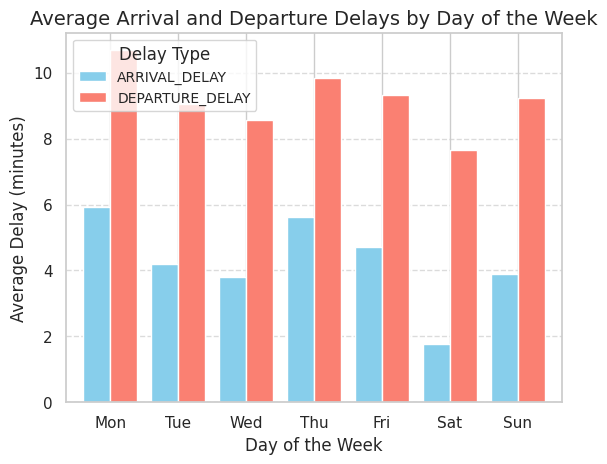

In [ ]:
average_delays_by_day = flights.groupby('DAY_OF_WEEK')[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']].mean()

plt.figure(figsize=(12, 6))

average_delays_by_day[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']].plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], width=0.8)

plt.title('Average Arrival and Departure Delays by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title="Delay Type", loc="upper left", fontsize=10)

plt.show()


As we can see the number of delays on Mondays is the highest.

Delays by month

June has the highest number of delays. This may be due to the fact that many people take vacations, holidays and airports are overloaded. Perhaps we need to allocate more people or think through an action plan for the peak season.


Delays by airlines

<ipython-input-65-a493755a6cdc>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_value = value + airline_delays['ARRIVAL_DELAY'][index]


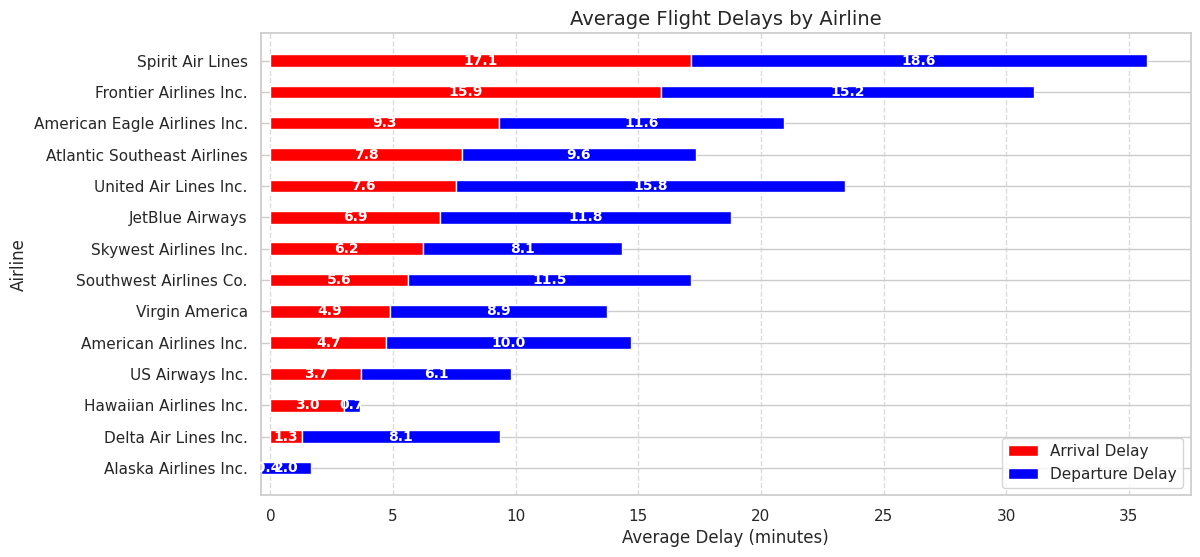

In [ ]:
airline_delays = flights.groupby('AIRLINE_AIRLINE')[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']].mean().sort_values(by='ARRIVAL_DELAY', ascending=True)

plt.figure(figsize=(12, 6))
bar_width = 0.4

plt.barh(airline_delays.index, airline_delays['ARRIVAL_DELAY'], color='red', label='Arrival Delay', height=bar_width)
plt.barh(airline_delays.index, airline_delays['DEPARTURE_DELAY'], color='blue', label='Departure Delay', height=bar_width, left=airline_delays['ARRIVAL_DELAY'])

for index, value in enumerate(airline_delays['ARRIVAL_DELAY']):
    plt.text(value / 2, index, f'{value:.1f}', va='center', ha='center', color='white', fontsize=10, fontweight='bold')

for index, value in enumerate(airline_delays['DEPARTURE_DELAY']):
    total_value = value + airline_delays['ARRIVAL_DELAY'][index]
    plt.text(total_value - (value / 2), index, f'{value:.1f}', va='center', ha='center', color='white', fontsize=10, fontweight='bold')

plt.title('Average Flight Delays by Airline', fontsize=14)
plt.xlabel('Average Delay (minutes)', fontsize=12)
plt.ylabel('Airline', fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Spirit Air Lines has more delays than others. We need to contact this company for detailed analysis

 Let's see how delays are corelated with number of flight for each airlines. (my hypotesis: more flights more delays)

                              Flight_Count  Average_Arrival_Delay  \
AIRLINE_AIRLINE                                                     
Alaska Airlines Inc.                   746              -0.976563   
American Airlines Inc.                2440               3.184957   
American Eagle Airlines Inc.           939               6.387730   
Atlantic Southeast Airlines           2365               6.573437   
Delta Air Lines Inc.                  2449               0.110033   
Frontier Airlines Inc.                 820              12.481607   
Hawaiian Airlines Inc.                 310               1.899346   
JetBlue Airways                       1159               6.674062   
Skywest Airlines Inc.                 2040               5.827945   
Southwest Airlines Co.                6669               4.374964   
Spirit Air Lines                       454              14.471800   
US Airways Inc.                        960               3.706209   
United Air Lines Inc.             

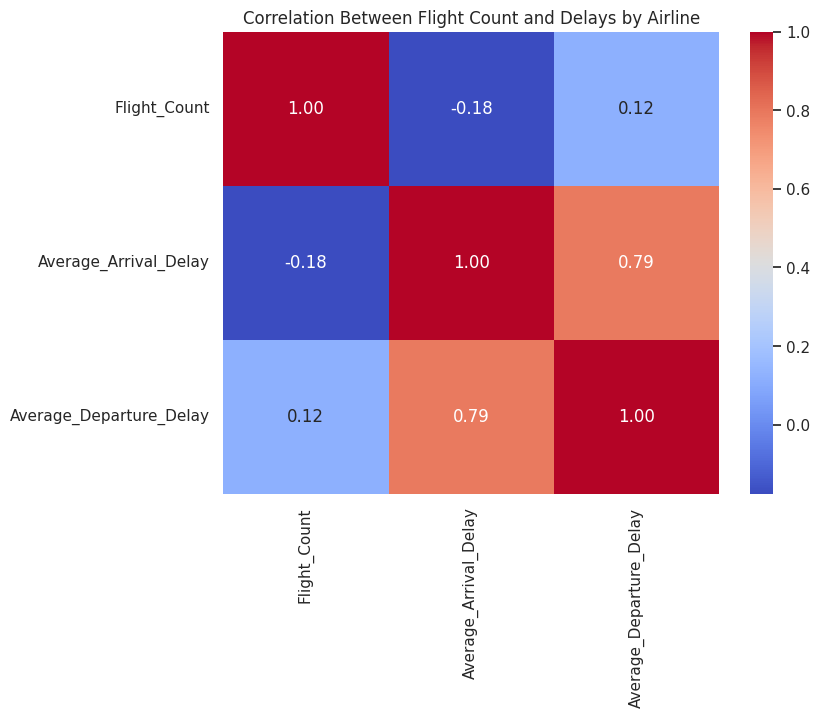

In [ ]:
flights_count = flights.groupby('AIRLINE_AIRLINE')['FLIGHT_NUMBER'].nunique()

airline_delays = flights.groupby('AIRLINE_AIRLINE')[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']].mean()

airline_info = pd.DataFrame({
    'Flight_Count': flights_count,
    'Average_Arrival_Delay': airline_delays['ARRIVAL_DELAY'],
    'Average_Departure_Delay': airline_delays['DEPARTURE_DELAY']
})

print(airline_info)

correlation = airline_info.corr()

print("Correlation Matrix:")
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Between Flight Count and Delays by Airline')
plt.show()


As we can see my hypothesis is not correct. But there is correlation betwen Average Arrival Delay and Average Depature Delay. Which is not surprising  Continue analysis...

Delay by types of delay





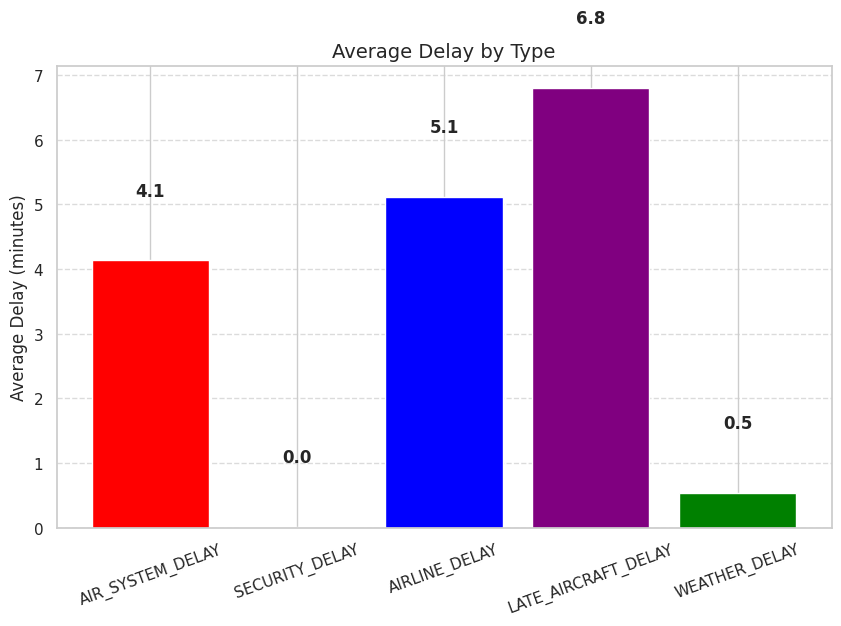

In [ ]:
delay_types = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].mean()

plt.figure(figsize=(10, 6))
colors = ['red', 'orange', 'blue', 'purple', 'green']
plt.bar(delay_types.index, delay_types.values, color=colors)

for index, value in enumerate(delay_types.values):
    plt.text(index, value + 1, f'{value:.1f}', ha='center', fontsize=12, fontweight='bold')

plt.title('Average Delay by Type', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

  See closely at LATE_AIRCRAFT_DELAY and ailine (my hypothesis: the previous flight used the same aircraft. this would indicate that there may be poor schedule management or technical problems with the aircraft)

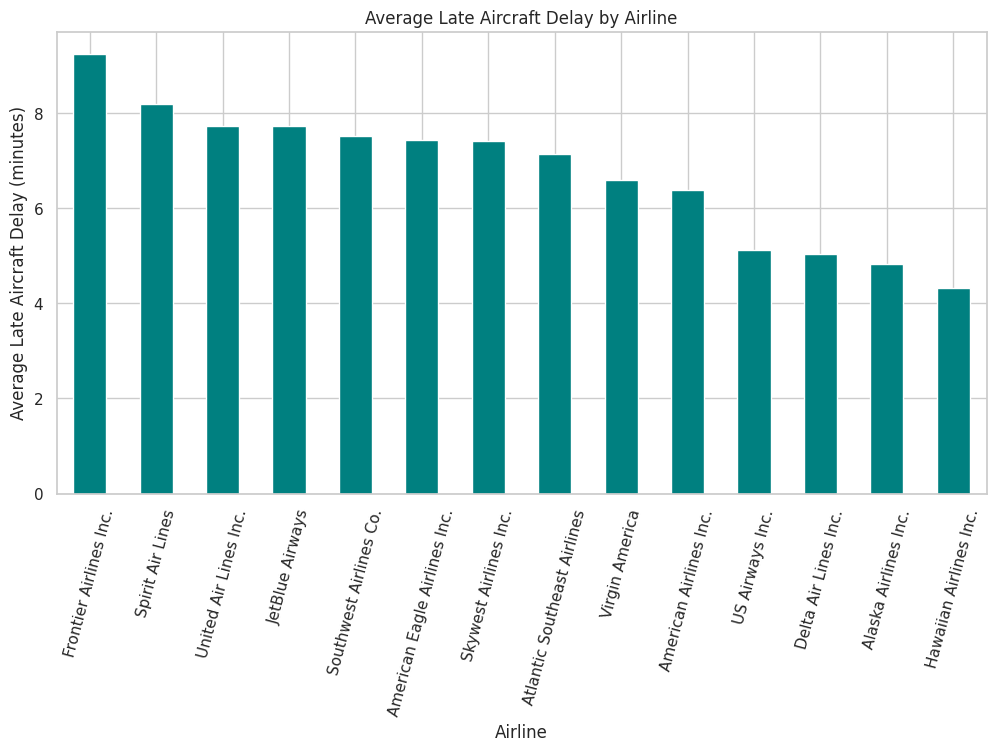

In [ ]:
airline_late_aircraft_delay = flights.groupby('AIRLINE_AIRLINE')['LATE_AIRCRAFT_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
airline_late_aircraft_delay.plot(kind='bar', color='teal')
plt.title('Average Late Aircraft Delay by Airline')
plt.ylabel('Average Late Aircraft Delay (minutes)')
plt.xlabel('Airline')
plt.xticks(rotation=75)
plt.show()


Airlinr "Frontier Airlines Inc" have promlems with organisation. It need more detail analysys

Now let's see at AIRLINE_DELAY and ailine  The  hypothesis is the same:  there may be poor schedule management or technical problems with the aircraft

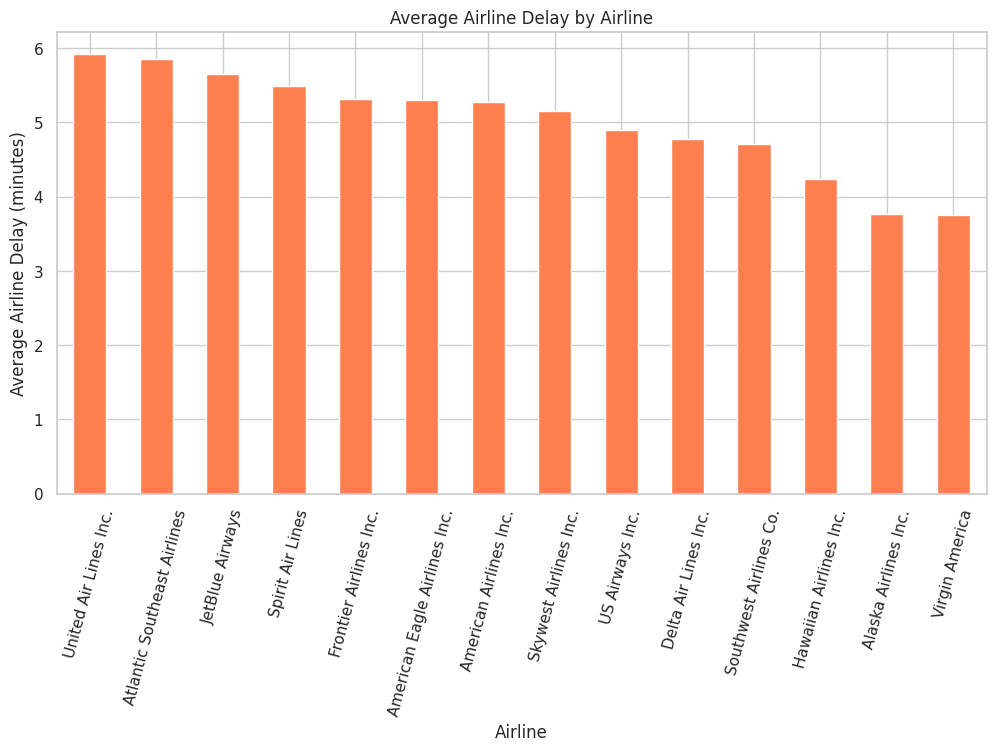

In [ ]:
airline_airline_delay = flights.groupby('AIRLINE_AIRLINE')['AIRLINE_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
airline_airline_delay.plot(kind='bar', color='coral')
plt.title('Average Airline Delay by Airline')
plt.ylabel('Average Airline Delay (minutes)')
plt.xlabel('Airline')
plt.xticks(rotation=75)
plt.show()


So we need to contact these airlines to further improve air travel

Calculate average WEATHER_DELAY by month.

<ipython-input-46-cbfdc19c9ffc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_delay_by_month.index, y=weather_delay_by_month.values, palette='Blues_d')


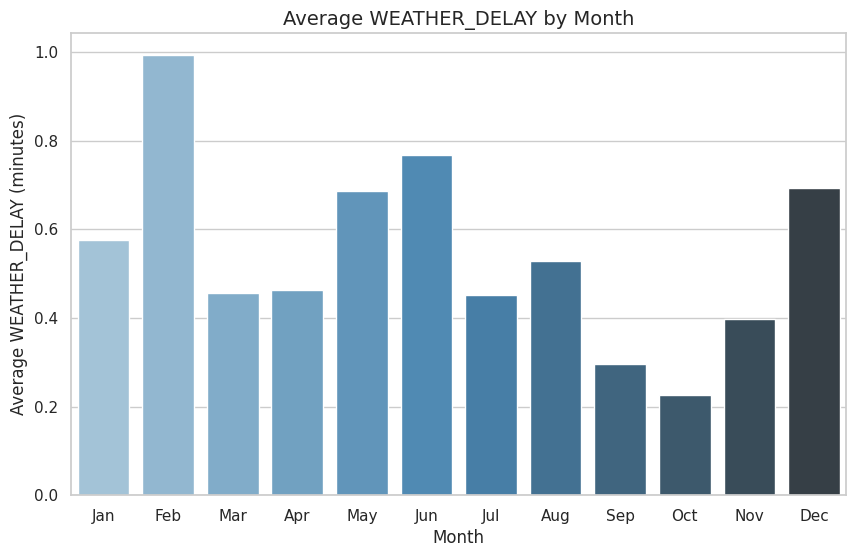

In [ ]:
weather_delay_by_month = flights.groupby('MONTH')['WEATHER_DELAY'].mean()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_delay_by_month.index, y=weather_delay_by_month.values, palette='Blues_d')

plt.title('Average WEATHER_DELAY by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average WEATHER_DELAY (minutes)', fontsize=12)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

Feb and Jun have the hugest delay time.
1. February's High Delays (Winter Challenges)
 - De-icing procedures: Add 15-30 minutes per aircraft during winter operations
 - Aircraft availability: More maintenance issues in cold weather
2. June's Extreme Delays (Summer Strain)
- Weather volatility: Thunderstorms cause ~75% more cancellations than winter
- Vacation overload: Flight volumes peak approximatly 40% above annual average
- Flights compete for same runway slots
- Baggage delays: Summer luggage volumes slow turnaround times
For February:
Invest in advanced de-icing systems at northern hubs
Implement dynamic pricing to smooth demand spikes
Pre-position spare aircraft at key airports
For June:
Expand ground crew staffing
Optimize summer thunderstorm rerouting protocols
Launch passenger awareness campaigns about peak delays


Delay by the airports

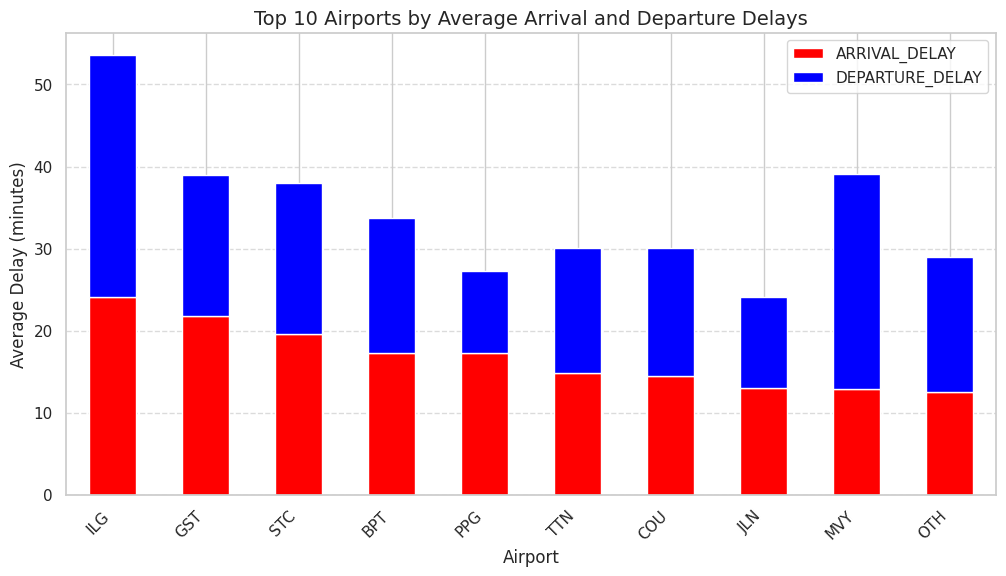

In [ ]:
airport_delays = flights.groupby('ORIGIN_AIRPORT')[['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'WEATHER_DELAY']].mean()

airport_delays_sorted = airport_delays.sort_values(by='ARRIVAL_DELAY', ascending=False)

top_10_airports = airport_delays_sorted.head(10)

plt.figure(figsize=(12, 6))
top_10_airports[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']].plot(kind='bar', stacked=True, color=['red', 'blue'], ax=plt.gca())

plt.title('Top 10 Airports by Average Arrival and Departure Delays', fontsize=14)
plt.xlabel('Airport', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Here is the problem!!! Need to contact the airport administration and improve their management. Best to invite an aviation consultant